# Plotting - moessbauer spectrum

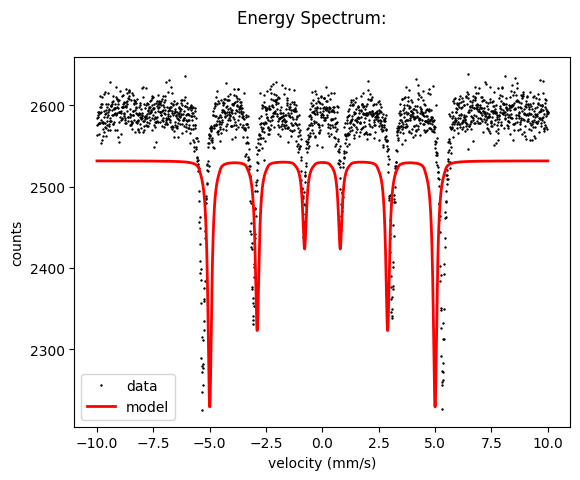

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(r'../hello_nexus/example_spectrum.txt')

velocity_experiment = data[:,0]
intensity_experiment = data[:,1]


site = nx.Hyperfine(magnetic_field = nx.Var(value = 31, min = 25, max = 35, fit = True, id = "magnetic field"),
                isotropic = True)

mat_Fe = nx.Material.Template(nx.lib.material.Fe)

mat_Fe.hyperfine_sites = [site]

layer_Fe = nx.Layer(id = "Fe",
                    material = mat_Fe,
                    thickness = 3000)

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam()
beam.Unpolarized()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

spectrum = nx.MoessbauerSpectrum(experiment = exp,
                                 velocity = velocity_experiment,  # the measured velocity
                                 intensity_data = intensity_experiment)  # the measured intensity to be fit


intensity = spectrum.Calculate()

spectrum.Plot(velocity = True)


Run Fit instance with id:  

Starting fit with 1 measurement data set(s) and 3 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   ES scaling |             2638.74 |                0 |           263874
    1 |                    ES backgr |             257.138 |                0 |          25713.8
    2 |               magnetic field |                  31 |               25 |               35

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 6, Initial cost: 6.760795e+02, Final cost: 2.142308e+01, Termination: CONVERGENCE

Gradient error analysis.


Fit performed with algorithm:
LevMar
Error analysis:
Gradient

Using 3 fit parameter(s):

  no. |                           id |          fit value |   +/- std dev | initial value |          min |          max
    0 |                   ES 

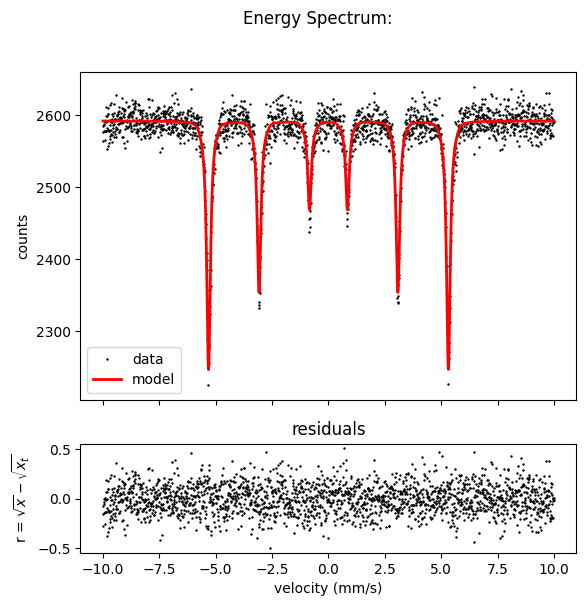

In [2]:
fit = nx.Fit(measurements = [spectrum])

fit.Evaluate()

spectrum.Plot(data=True,
              residuals=True,
              velocity=True,
              datacolor='black',
              theorycolor='r',
              theorywidth=2,
              datalinestyle='none',
              datamarker='+',
              datamarkersize=2,
              datafillstyle='full',
              legend=True,
              errors=False,
              errorcap=2)